In [1]:
import pandas as pd
import numpy as np

# Number of samples for students and scholarships
num_students = 50
num_scholarships = 10

# Creating random student data
np.random.seed(42)
student_data = {
    'Student_ID': np.arange(1, num_students + 1),
    'GPA': np.round(np.random.uniform(2.0, 4.0, num_students), 2),
    'Extracurriculars': np.random.randint(0, 11, num_students),
    'Family_Income': np.random.randint(10000, 100000, num_students),
    'Previous_Scholarships': np.random.choice(['Yes', 'No'], num_students)
}

students_df = pd.DataFrame(student_data)

# Creating random scholarship criteria data
scholarship_data = {
    'Scholarship_ID': np.arange(1, num_scholarships + 1),
    'Min_GPA': np.round(np.random.uniform(2.5, 3.5, num_scholarships), 2),
    'Min_Extracurriculars': np.random.randint(1, 6, num_scholarships),
    'Max_Family_Income': np.random.randint(50000, 75000, num_scholarships)
}

scholarships_df = pd.DataFrame(scholarship_data)

# Saving the datasets
students_path = "/mnt/data/simulated_students.csv"
scholarships_path = "/mnt/data/simulated_scholarships.csv"

students_df.to_csv("C:/Users/rukmi/Scholarship Prediction Model using AI/students.csv", index=False)
scholarships_df.to_csv("C:/Users/rukmi/Scholarship Prediction Model using AI/scholarships.csv", index=False)

students_path, scholarships_path


('/mnt/data/simulated_students.csv', '/mnt/data/simulated_scholarships.csv')

In [2]:
import pandas as pd

# Load the student and scholarship datasets
students_df = pd.read_csv('students.csv')
scholarships_df = pd.read_csv('scholarships.csv')

# Function to check eligibility for each student against a specific scholarship
def check_eligibility(row, scholarship):
    return (row['GPA'] >= scholarship['Min_GPA'] and 
            row['Extracurriculars'] >= scholarship['Min_Extracurriculars'] and 
            row['Family_Income'] <= scholarship['Max_Family_Income'])

# Loop through each scholarship and check eligibility for each student
for i, scholarship in scholarships_df.iterrows():
    # Create a new column for each scholarship to indicate eligibility
    students_df[f'Scholarship_{scholarship["Scholarship_ID"]}_Eligible'] = students_df.apply(lambda row: check_eligibility(row, scholarship), axis=1)

# Preview the updated students dataframe with eligibility columns
print(students_df.head())


   Student_ID   GPA  Extracurriculars  Family_Income Previous_Scholarships  \
0           1  2.75                 1          80592                    No   
1           2  3.90                 9          18110                   Yes   
2           3  3.46                 1          89309                   Yes   
3           4  3.20                 9          37266                    No   
4           5  2.31                 3          62992                   Yes   

   Scholarship_1.0_Eligible  Scholarship_2.0_Eligible  \
0                     False                     False   
1                      True                      True   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   Scholarship_3.0_Eligible  Scholarship_4.0_Eligible  \
0                     False                     False   
1                      True                      True   
2                

In [3]:
print(students_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_ID                 50 non-null     int64  
 1   GPA                        50 non-null     float64
 2   Extracurriculars           50 non-null     int64  
 3   Family_Income              50 non-null     int64  
 4   Previous_Scholarships      50 non-null     object 
 5   Scholarship_1.0_Eligible   50 non-null     bool   
 6   Scholarship_2.0_Eligible   50 non-null     bool   
 7   Scholarship_3.0_Eligible   50 non-null     bool   
 8   Scholarship_4.0_Eligible   50 non-null     bool   
 9   Scholarship_5.0_Eligible   50 non-null     bool   
 10  Scholarship_6.0_Eligible   50 non-null     bool   
 11  Scholarship_7.0_Eligible   50 non-null     bool   
 12  Scholarship_8.0_Eligible   50 non-null     bool   
 13  Scholarship_9.0_Eligible   50 non-null     bool   
 

In [4]:
print(students_df.describe())

       Student_ID        GPA  Extracurriculars  Family_Income
count    50.00000  50.000000         50.000000      50.000000
mean     25.50000   2.891400          5.460000   56379.860000
std      14.57738   0.577892          3.150704   25794.095194
min       1.00000   2.040000          0.000000   10206.000000
25%      13.25000   2.370000          2.250000   33508.250000
50%      25.50000   2.870000          6.500000   59547.500000
75%      37.75000   3.302500          8.000000   77121.000000
max      50.00000   3.940000         10.000000   97939.000000


In [5]:
# Convert all boolean columns to integers (1 for True, 0 for False)
students_df[students_df.select_dtypes(['bool']).columns] = students_df.select_dtypes(['bool']).astype(int)

# Verify the changes
print(students_df.head())


   Student_ID   GPA  Extracurriculars  Family_Income Previous_Scholarships  \
0           1  2.75                 1          80592                    No   
1           2  3.90                 9          18110                   Yes   
2           3  3.46                 1          89309                   Yes   
3           4  3.20                 9          37266                    No   
4           5  2.31                 3          62992                   Yes   

   Scholarship_1.0_Eligible  Scholarship_2.0_Eligible  \
0                         0                         0   
1                         1                         1   
2                         0                         0   
3                         0                         1   
4                         0                         0   

   Scholarship_3.0_Eligible  Scholarship_4.0_Eligible  \
0                         0                         0   
1                         1                         1   
2                

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (if not already loaded in memory)
# students_df = pd.read_csv('simulated_students.csv')  # Only if necessary

# Define the features (GPA, Extracurriculars, Family_Income)
X = students_df[['GPA', 'Extracurriculars', 'Family_Income']]

# Define the target (Eligibility for Scholarship 1)
y = students_df['Scholarship_1.0_Eligible']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Model Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\Users\rukmi\anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rukmi\anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rukmi\anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [7]:
print(students_df['Scholarship_1.0_Eligible'].value_counts())

0    44
1     6
Name: Scholarship_1.0_Eligible, dtype: int64


In [8]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Model Accuracy: 90.00%
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.50      1.00      0.67         1

    accuracy                           0.90        10
   macro avg       0.75      0.94      0.80        10
weighted avg       0.95      0.90      0.91        10



In [10]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Model Accuracy: 80.00%
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.33      1.00      0.50         1

    accuracy                           0.80        10
   macro avg       0.67      0.89      0.69        10
weighted avg       0.93      0.80      0.84        10



In [12]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
X = students_df[['GPA', 'Extracurriculars', 'Family_Income']]
y = students_df['Scholarship_1.0_Eligible']

# Apply SMOTE to balance the dataset (if not already done)
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Split the resampled dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Model Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



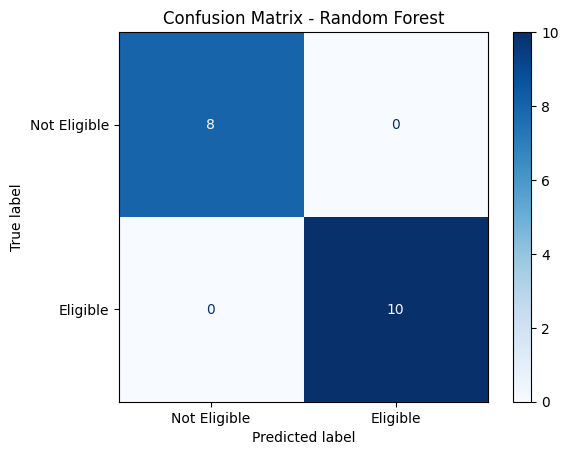

In [13]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Eligible", "Eligible"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.94444444 1.         1.         1.         1.        ]
Mean Cross-Validation Score: 0.99


Cross-Validation Scores: [0.94444444 1.         1.         1.         1.        ]
Mean Cross-Validation Score: 0.99
Standard Deviation of CV Scores: 0.02


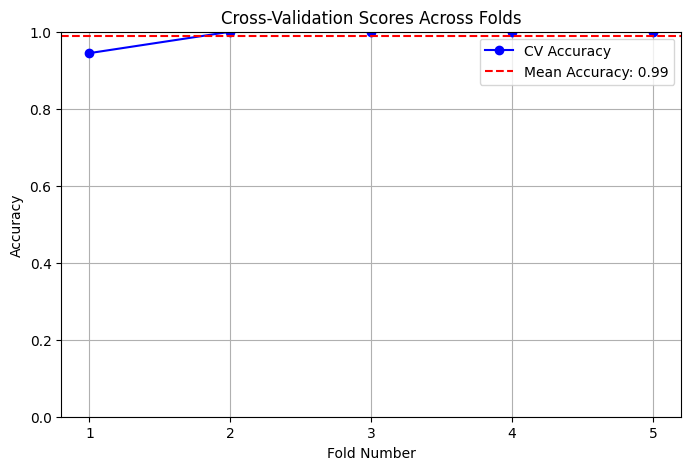

In [23]:
import matplotlib.pyplot as plt

# Print Cross-Validation Scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.2f}")

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue', label='CV Accuracy')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {cv_scores.mean():.2f}')
plt.title('Cross-Validation Scores Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Random Forest Classifier for each Scholarship

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Assuming students_df is already loaded
# Example of creating students_df for reference:
# students_df = pd.DataFrame(...) # Your existing DataFrame

# Create a dictionary to hold the trained models for each scholarship
rf_models = {}
accuracies = {}

# Iterate over each scholarship eligibility column
for scholarship in students_df.columns[5:]:  # Assuming the eligibility columns start from index 5
    # Set the target variable based on the scholarship eligibility column
    y = students_df[scholarship].astype(int)  # Convert boolean to int (1 for True, 0 for False)
    
    # Define features (GPA, Extracurriculars, Family_Income)
    X = students_df[['GPA', 'Extracurriculars', 'Family_Income']]
    
    
    smote = SMOTE(k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    # Split the resampled dataset into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    # Train the Random Forest model for this scholarship
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Store the trained model in the dictionary
    rf_models[scholarship] = rf_model
    
    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy in the dictionary
    accuracies[scholarship] = accuracy

# After this loop, rf_models dictionary contains trained models for each scholarship


In [16]:
print(rf_models)

{'Scholarship_1.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_2.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_3.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_4.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_5.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_6.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_7.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_8.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_9.0_Eligible': RandomForestClassifier(random_state=42), 'Scholarship_10.0_Eligible': RandomForestClassifier(random_state=42)}


In [17]:
# Print the accuracies for each model
for scholarship, accuracy in accuracies.items():
    print(f"{scholarship}: {accuracy * 100:.2f}%")

Scholarship_1.0_Eligible: 100.00%
Scholarship_2.0_Eligible: 100.00%
Scholarship_3.0_Eligible: 94.44%
Scholarship_4.0_Eligible: 100.00%
Scholarship_5.0_Eligible: 100.00%
Scholarship_6.0_Eligible: 100.00%
Scholarship_7.0_Eligible: 100.00%
Scholarship_8.0_Eligible: 94.44%
Scholarship_9.0_Eligible: 100.00%
Scholarship_10.0_Eligible: 93.75%


In [18]:
#Saving the model using pickel

In [19]:
import pickle

# Save each trained model to a file
for scholarship, model in rf_models.items():
    with open(f"{scholarship}.pkl", "wb") as file:
        pickle.dump(model, file)


In [20]:
for scholarship, model in rf_models.items():
    print(f"{scholarship}: {type(model)}")

Scholarship_1.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_2.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_3.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_4.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_5.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_6.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_7.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_8.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_9.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scholarship_10.0_Eligible: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [21]:
#Example input for checking

import pandas as pd

# Example input as a DataFrame
test_input = pd.DataFrame([[5.0, 10, 50000]], columns=['GPA', 'Extracurriculars', 'Family_Income'])

# Prediction loop with the DataFrame
for scholarship, model in rf_models.items():
    prediction = model.predict(test_input)
    print(f"{scholarship} Prediction: {'Eligible' if prediction[0] == 1 else 'Not Eligible'}")


Scholarship_1.0_Eligible Prediction: Eligible
Scholarship_2.0_Eligible Prediction: Not Eligible
Scholarship_3.0_Eligible Prediction: Eligible
Scholarship_4.0_Eligible Prediction: Eligible
Scholarship_5.0_Eligible Prediction: Not Eligible
Scholarship_6.0_Eligible Prediction: Not Eligible
Scholarship_7.0_Eligible Prediction: Eligible
Scholarship_8.0_Eligible Prediction: Eligible
Scholarship_9.0_Eligible Prediction: Eligible
Scholarship_10.0_Eligible Prediction: Eligible


In [22]:
import sklearn
import pandas as pd
import numpy as np

print(f"scikit-learn version: {sklearn.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")


scikit-learn version: 1.2.2
Pandas version: 1.5.3
Numpy version: 1.24.2
